In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from tensorflow.keras import Sequential,datasets,layers

In [5]:
#loading data 
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [6]:
#shape of data 
print(f"Shape of training  input data:{x_train.shape}")
print(f"Shape of training  output data:{y_train.shape}")
print(f"Shape of testing output data:{x_test.shape}")
print(f"Shape of testing  output data:{y_test.shape}")

Shape of training  input data:(60000, 28, 28)
Shape of training  output data:(60000,)
Shape of testing output data:(10000, 28, 28)
Shape of testing  output data:(10000,)


In [15]:
#flatten the data 
x_train = x_train.reshape(60000,-1)/255.0
x_test = x_test.reshape(10000,-1)/255.0


In [16]:
x_train.shape

(60000, 784)

In [17]:
classes = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker"," Bag", "Ankle boot",]

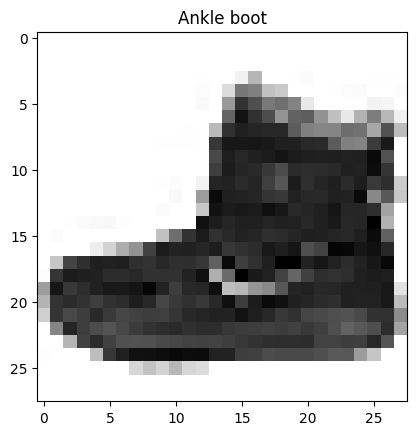

In [22]:
#Showing image 

plt.imshow(x_train[0].reshape((28,28)),cmap = 'binary')
plt.title(f"{classes[y_train[0]]}")
plt.show()

In [27]:
#building model

model = Sequential()
model.add(layers.Dense(64,activation='relu',input_dim = x_train.shape[1]))
model.add(layers.Dense(64,activation ='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [29]:
model.fit(x_train,y_train,epochs=200,batch_size=100)

Epoch 1/200


600/600 [==============================] - 4s 3ms/step - loss: 0.5615 - accuracy: 0.8031
Epoch 2/200
600/600 [==============================] - 2s 3ms/step - loss: 0.3963 - accuracy: 0.8574
Epoch 3/200
600/600 [==============================] - 2s 3ms/step - loss: 0.3555 - accuracy: 0.8702
Epoch 4/200
600/600 [==============================] - 2s 3ms/step - loss: 0.3360 - accuracy: 0.8779
Epoch 5/200
600/600 [==============================] - 2s 3ms/step - loss: 0.3165 - accuracy: 0.8845
Epoch 6/200
600/600 [==============================] - 2s 3ms/step - loss: 0.3051 - accuracy: 0.8870
Epoch 7/200
600/600 [==============================] - 2s 3ms/step - loss: 0.2942 - accuracy: 0.8915
Epoch 8/200
600/600 [==============================] - 2s 3ms/step - loss: 0.2826 - accuracy: 0.8955
Epoch 9/200
600/600 [==============================] - 2s 3ms/step - loss: 0.2738 - accuracy: 0.8981
Epoch 10/200
600/600 [==============================] - 2s 3ms/step - loss: 0.2651 - accu

In [30]:
y_out = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [38]:
y_predict = np.array(y_out).argmax(axis = 1)

In [47]:
accuracy = y_predict[y_predict==y_test].shape[0]/y_predict.shape[0]*100

In [48]:
print(f"Accuracy one testing model:{accuracy}")

Accuracy one testing model:88.23


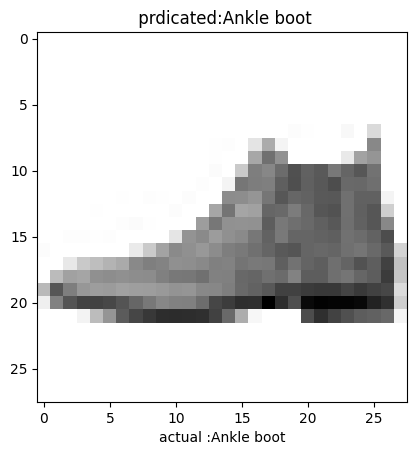

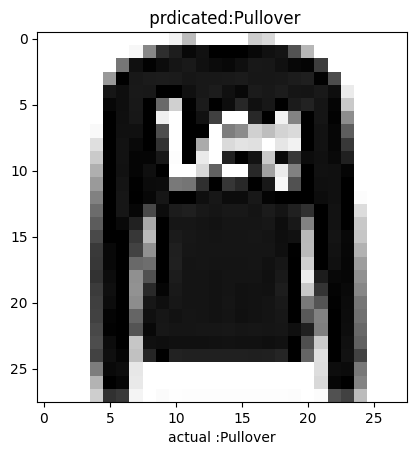

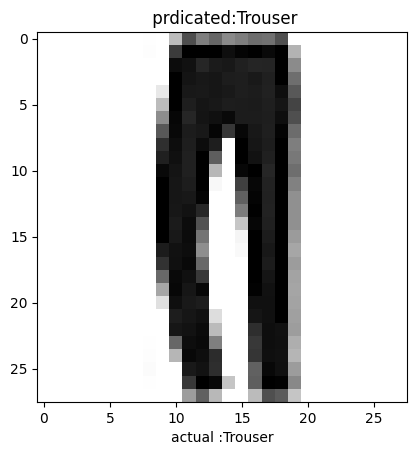

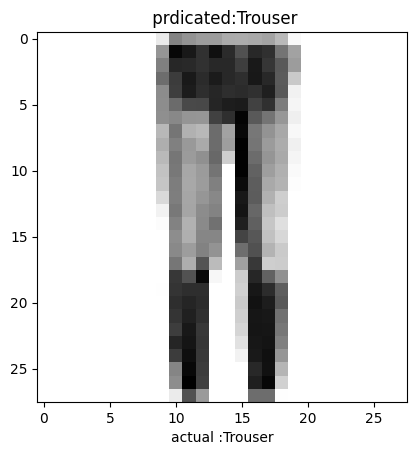

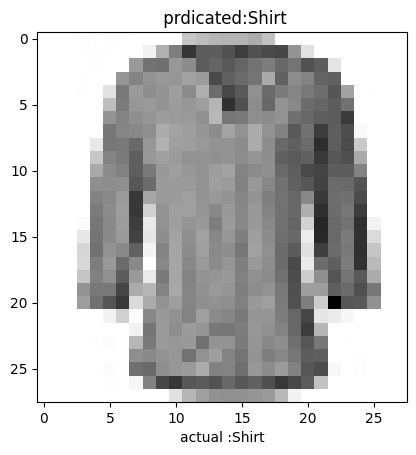

In [51]:
#showing output
for i in range(5):
    plt.imshow(x_test[i].reshape((28,28)),cmap = 'binary')
    plt.title(f" prdicated:{classes[y_predict[i]]}")
    plt.xlabel(f"actual :{classes[y_test[i]]}")
    plt.show()

In [52]:
model.save('Fashion')

INFO:tensorflow:Assets written to: Fashion\assets


INFO:tensorflow:Assets written to: Fashion\assets
